In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Hawkes Processes

## 1st method: Ogata

On va prendre une intensité initiale lambda = 1, et on ajoute e^(s-t) à chaque évènement

In [56]:
Tmax = 20
Lambda_init = 1

J'essaie de faire une fonction pour actualiser l'intensité du processus :

In [57]:
def jump(t,Time_jumps,n_jumps, Lambda_i):
    val = Lambda_i
    for j in range(0,n_jumps):
        if (t >= Time_jumps[j]):
            val += np.exp(-2*(t-Time_jumps[j]))
    return(val)

En utilisant le code du poisson inhomogène :

In [58]:
T = []
t = 0
i = 1
x = []
y = []
Lambda_Hawkes = Lambda_init
Lambda_bar = [Lambda_Hawkes]

while(t < Tmax):
    # Tirage d'un nouveau temps aléatoire, selon l'intensité modifiée
    t = t + np.random.exponential(1/Lambda_bar[-1])    

    if(t >= Tmax):# Si on dépasse le temps limite, fin de la boucle
        x.append(Tmax)
        #Lambda_bar.append(Lambda_bar[-1])
        break
    

    x.append(t)
    # On tire selon une loi uniforme pour faire une acceptation rejet
    u = np.random.uniform(0,1)
    y.append(u*Lambda_bar[-1])
    # On actualise l'intensité 
    Lambda_Hawkes = jump(t,T,len(T), Lambda_init)
    if(u <= Lambda_Hawkes/Lambda_bar[-1] ):
        T.append(t)
        Lambda_Hawkes = jump(t,T,len(T), Lambda_init)
    Lambda_bar.append(Lambda_Hawkes) 

In [59]:
jump_values = [jump(t, T, len(T), Lambda_init) for t in np.linspace(0,Tmax, 1000)]

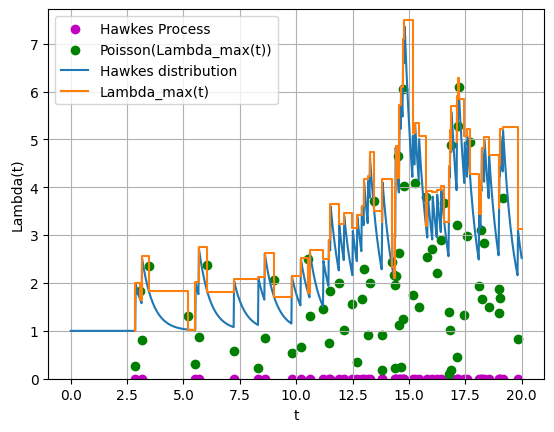

In [67]:
# Show plot
plt.grid(True)
plt.scatter(T, [0]*len(T), color='m', label='Hawkes Process')
plt.scatter(x[:-1], np.array(y), color='g', label='Poisson(Lambda_max(t))')
plt.plot(np.linspace(0, Tmax, 1000), jump_values, label='Hawkes distribution')
plt.ylim(0)
plt.step(x, Lambda_bar, where='pre', label='Lambda_max(t)')
plt.xlabel('t')
plt.ylabel('Lambda(t)')
plt.legend()
plt.grid(True)

# Save the plot as "hawkes_ogata.png"
plt.savefig('hawkes_ogata_int.png')


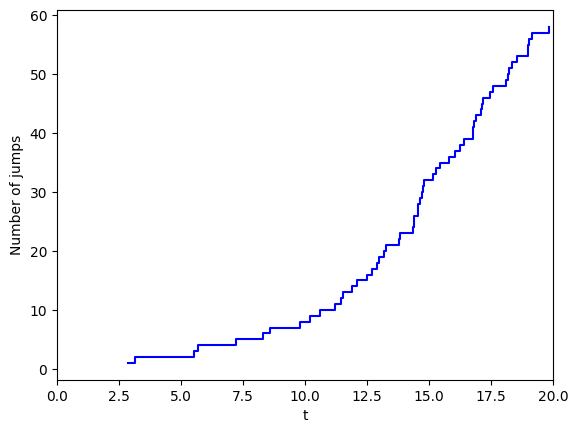

In [68]:
plt.step(T, np.arange(1, len(T) + 1), where='post', color='blue')
plt.xlim(0,Tmax)
plt.xlabel('t')
plt.ylabel('Number of jumps')
plt.savefig('hawkes_ogata.png')


## 2cd method: Génération par génération

Pour que ça fonctionne bien, il faut penser à vectoriser tout ça. Première étape : on tire le nombre d'évènements suivant une loi de Poisson de paramètre Lambda_0, et on les répartis uniformément sur l'intervalle voulu. Pour chaque évènement, on va tirer la génération d'après suivant une loi h(.-T_i), h étant une exponentielle décroissante.

In [62]:
num_immigrant = np.random.poisson(Lambda_init * Tmax)
immigrant_times = np.sort(np.random.uniform(0, Tmax, num_events))

Now 